# Sample Solution for Milestone 1

This is the sample solution for milestone 1 of the information retrieval lab in the summer term of 2023.

You can build subsequent milestones on this sample solution or you can continue with your custom result of milestone 1.

**Build the image:**

`docker build -t registry.webis.de/code-research/tira/tira-user-ir-lab-sose-2023-<YOUR-GROUP-NAME>/ir-datasets:0.0.1 .`

**Start a jupyter notebook in the image:**

`docker run -p 8888:8888 --rm -ti -w /workspace -v ${PWD}:/workspace --entrypoint jupyter registry.webis.de/code-research/tira/tira-user-ir-lab-sose-2023-<YOUR-GROUP-NAME>/ir-datasets:0.0.1 notebook --allow-root --ip 0.0.0.0`


# Step 1: First look into the data

In [5]:
# Should print 53673 lines
!cat ir-anthology-07-11-2021-ss23.jsonl|wc -l

53673


From looking at some example document we decided that we will build our retrieval solutions on the following fields that we think are interesting for retrieval:

- id
- abstract
- title
- authors
- year
- booktitle

We ignore all other fields.

# Step 2: Process the data

Following the description above, we use the fields id, abstract, title, authors, year, and booktitle and ignore other fields. We do not enrich the data, e.g., with external sources like citation counts.
The following snippet creates the processed data in a file `ir-anthology-07-11-2021-ss23-processed.jsonl` that is used for all subsequent steps as document representation.

In [4]:
# ToDo: produce a file ir-anthology-processed.jsonl that has the fields and information that you want them to have.
# If you want to reuse the file ir_anthology.py in this sketch, your file processing should add fields  doc_id, abstract, title, authors, year, and booktitle
# You still can add all other information that you like, e.g., incorporating citation numbers etc. from other sources.

# Step 3: Integration to `ir_dasets`

The following shows our source code of our integration `ir_anthology.py`. We introduced a class `IrAnthologyDocument` with the fields described above. We decided, that by default, concatenating the title and abstract is a reasonable way to retrieve documents (hence, this will be the default_text).

In [2]:
!cat ir_anthology.py

import ir_datasets
from ir_datasets.formats import JsonlDocs, TrecXmlQueries, TrecQrels
from typing import NamedTuple
from ir_datasets.datasets.base import Dataset

class IrAnthologyDocument(NamedTuple):
    doc_id: str
    abstract: str
    title: str
    authors: list
    year: str
    booktitle: str

    def default_text(self):
        return self.title + ' ' + self.abstract

ir_datasets.registry.register('iranthology-tutors', Dataset(
    JsonlDocs(ir_datasets.util.PackageDataFile(path='datasets_in_progress/ir-anthology-processed.jsonl'), doc_cls=IrAnthologyDocument, lang='en'),
    TrecXmlQueries(ir_datasets.util.PackageDataFile(path='datasets_in_progress/topics.xml'), lang='en'),
    TrecQrels(ir_datasets.util.PackageDataFile(path='datasets_in_progress/qrels.txt'), {0: 'Not Relevant', 1: 'Relevant'})
))


# Test everything locally

If you want to test everything locally, you can do this in three steps: (1) data import, (2) retrieval, and (3) rendering the retrieval results.

### Step 1: import the data
```
tira-run \
    --output-directory ${PWD}/iranthology-dataset-tira \
    --image registry.webis.de/code-research/tira/tira-user-ir-lab-sose-2023-<YOUR-GROUP-NAME>/ir-datasets:0.0.1 \
    --allow-network true \
    --command '/irds_cli.sh --ir_datasets_id iranthology-<YOUR-GROUP-NAME> --output_dataset_path $outputDir'
```

### Step 2: Retrieve on the data

```
tira-run \
    --input-directory ${PWD}/iranthology-dataset-tira \
    --image webis/tira-ir-starter-pyterrier:0.0.2-base \
    --command '/workspace/run-pyterrier-notebook.py --input $inputDataset --output $outputDir --notebook /workspace/full-rank-pipeline.ipynb'

```

### Step 3: Render the retrieval results

```
tira-run \
    --input-directory ${PWD}/tira-output \
    --image registry.webis.de/code-research/tira/tira-user-ir-lab-sose-2023-<YOUR-GROUP-NAME>/ir-datasets:0.0.1 \
    --allow-network true \
    --command 'diffir --dataset iranthology-<YOUR-GROUP-NAME> --web $outputDir/run.txt > $outputDir/run.html'
```

If everything works, you can navigate to the rendered run in `tira-output/run.html` that might look like this:

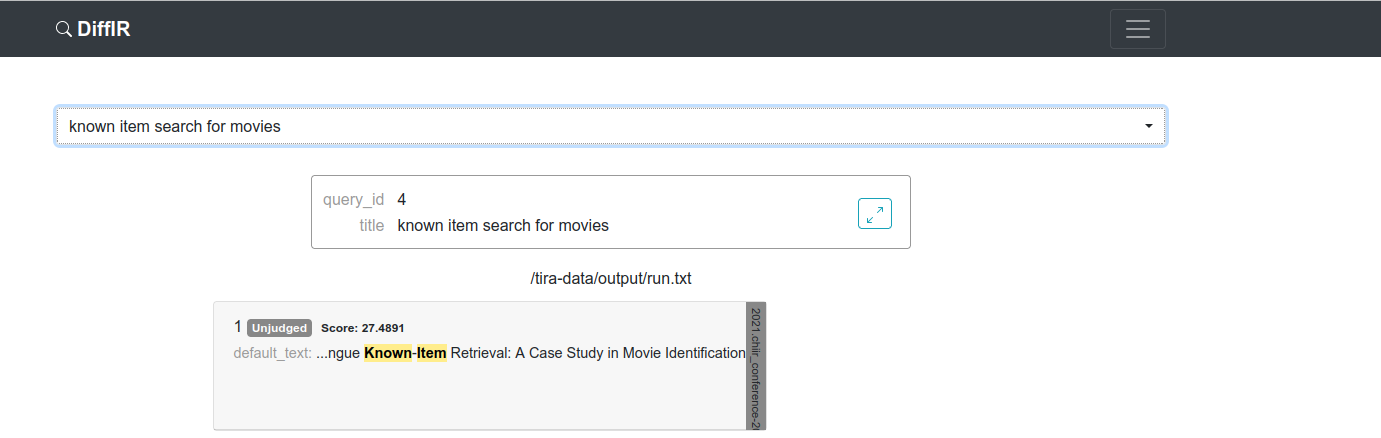



# Step Reflection

TODO: Write a reflection.

You might use code to showcase some things, e.g.

```
import ir_datasets
dataset = ir_datasets.load("iranthology-<YOUR-GROUP>")

print(dataset.docs_store().get('<SOME-DOCUMENT-ID>')
```

or something in this direction:

```
for query in dataset.queries_iter():
    print(query.query_id +': ' + query.title)
```